# **Packages needed**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# **Data needed**

In [2]:
anv_df = pd.read_csv('anv_df.csv')
dat_df = pd.read_csv('dat_df.csv')
hah_df = pd.read_csv('hah_df.csv')
kdc_df = pd.read_csv('kdc_df.csv')
naf_df = pd.read_csv('naf_df.csv')
pvt_df = pd.read_csv('pvt_df.csv')

# View the first few ones
print(anv_df.head())
print(dat_df.head())
print(hah_df.head())
print(kdc_df.head())
print(naf_df.head())
print(pvt_df.head())

         Date   High    Low   Open  Close   Volume
0  06/03/2025  17.45  17.10  17.20  17.45  1853100
1  05/03/2025  17.40  17.10  17.40  17.10  1613700
2  04/03/2025  17.50  17.15  17.50  17.35  1950000
3  03/03/2025  17.75  17.40  17.60  17.50  1797400
4  28/02/2025  17.85  17.55  17.65  17.60  2224500
         Date  High   Low  Open  Close  Volume
0  06/03/2025  7.94  7.94  7.94   7.94       0
1  05/03/2025  7.96  7.80  7.96   7.94     400
2  04/03/2025  8.15  7.85  8.15   7.85     800
3  03/03/2025  7.80  7.68  7.80   7.68     300
4  28/02/2025  7.68  7.60  7.67   7.60     800
         Date  High   Low  Open  Close   Volume
0  06/03/2025  51.7  50.0  51.2   50.7  3492300
1  05/03/2025  52.8  51.0  52.0   51.0  2064800
2  04/03/2025  52.4  51.5  52.4   52.1  2057600
3  03/03/2025  53.1  51.5  53.1   52.2  4080100
4  28/02/2025  53.7  52.3  52.8   53.2  2077900
         Date  High   Low  Open  Close  Volume
0  06/03/2025  58.2  57.3  58.0   58.0  304000
1  05/03/2025  58.5  57.5  58.

In [3]:
# View basic information
print(anv_df.info())
print(dat_df.info())
print(hah_df.info())
print(kdc_df.info())
print(naf_df.info())
print(pvt_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1500 non-null   object 
 1   High    1500 non-null   float64
 2   Low     1500 non-null   float64
 3   Open    1500 non-null   float64
 4   Close   1500 non-null   float64
 5   Volume  1500 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 70.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1500 non-null   object 
 1   High    1500 non-null   float64
 2   Low     1500 non-null   float64
 3   Open    1500 non-null   float64
 4   Close   1500 non-null   float64
 5   Volume  1500 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 70.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entri

In [4]:
# Change all to datetimelike
anv_df['Date'] = pd.to_datetime(anv_df['Date'], dayfirst=True)
dat_df['Date'] = pd.to_datetime(dat_df['Date'], dayfirst=True)
hah_df['Date'] = pd.to_datetime(hah_df['Date'], dayfirst=True)
kdc_df['Date'] = pd.to_datetime(kdc_df['Date'], dayfirst=True)
naf_df['Date'] = pd.to_datetime(naf_df['Date'], dayfirst=True)
pvt_df['Date'] = pd.to_datetime(pvt_df['Date'], dayfirst=True)

# View one of them to recheck
anv_df.head()

,Date,High,Low,Open,Close,Volume
0,2025-03-06,17.45,17.10,17.20,17.45,1853100
1,2025-03-05,17.40,17.10,17.40,17.10,1613700
2,2025-03-04,17.50,17.15,17.50,17.35,1950000
3,2025-03-03,17.75,17.40,17.60,17.50,1797400
4,2025-02-28,17.85,17.55,17.65,17.60,2224500


In [5]:
# Reverse the datasets
anv_df = anv_df.iloc[::-1]
dat_df = dat_df.iloc[::-1]
hah_df = hah_df.iloc[::-1]
kdc_df = kdc_df.iloc[::-1]
naf_df = naf_df.iloc[::-1]
pvt_df = pvt_df.iloc[::-1]

# View one of them to recheck
anv_df.head()

,Date,High,Low,Open,Close,Volume
1499,2019-03-05,29.20,28.70,29.00,28.70,657010
1498,2019-03-06,29.15,28.60,28.90,28.95,301010
1497,2019-03-07,29.10,28.85,29.00,28.95,420000
1496,2019-03-08,28.80,28.15,28.65,28.20,350260
1495,2019-03-11,28.30,27.90,28.20,28.05,342230


## **Technical indicators**

In [6]:
# Calculate simple moving average
anv_df['SMA_200'] = anv_df['Close'].rolling(window = 200).mean()
dat_df['SMA_200'] = dat_df['Close'].rolling(window = 200).mean()
hah_df['SMA_200'] = hah_df['Close'].rolling(window = 200).mean()
kdc_df['SMA_200'] = kdc_df['Close'].rolling(window = 200).mean()
naf_df['SMA_200'] = naf_df['Close'].rolling(window = 200).mean()
pvt_df['SMA_200'] = pvt_df['Close'].rolling(window = 200).mean()

# Drop all empty rows
anv_df.dropna(inplace = True)
dat_df.dropna(inplace = True)
hah_df.dropna(inplace = True)
kdc_df.dropna(inplace = True)
naf_df.dropna(inplace = True)
pvt_df.dropna(inplace = True)

# View one to check
anv_df.head()

,Date,High,Low,Open,Close,Volume,SMA_200
1300,2019-12-16,23.20,22.2,23.2,22.2,282750,26.37225
1299,2019-12-17,22.65,22.1,22.2,22.4,238560,26.34075
1298,2019-12-18,22.50,22.2,22.4,22.4,155610,26.30800
1297,2019-12-19,22.40,22.0,22.3,22.0,184540,26.27325
1296,2019-12-20,22.40,22.0,22.0,22.1,182860,26.24275


In [7]:
# Calculate RSI
anv_df['RSI'] = ta.momentum.RSIIndicator(anv_df['Close'].squeeze(), window = 14).rsi()
dat_df['RSI'] = ta.momentum.RSIIndicator(dat_df['Close'].squeeze(), window = 14).rsi()
hah_df['RSI'] = ta.momentum.RSIIndicator(hah_df['Close'].squeeze(), window = 14).rsi()
kdc_df['RSI'] = ta.momentum.RSIIndicator(kdc_df['Close'].squeeze(), window = 14).rsi()
naf_df['RSI'] = ta.momentum.RSIIndicator(naf_df['Close'].squeeze(), window = 14).rsi()
pvt_df['RSI'] = ta.momentum.RSIIndicator(pvt_df['Close'].squeeze(), window = 14).rsi()

# View one to check
anv_df.head()

,Date,High,Low,Open,Close,Volume,SMA_200,RSI
1300,2019-12-16,23.20,22.2,23.2,22.2,282750,26.37225,NaN
1299,2019-12-17,22.65,22.1,22.2,22.4,238560,26.34075,NaN
1298,2019-12-18,22.50,22.2,22.4,22.4,155610,26.30800,NaN
1297,2019-12-19,22.40,22.0,22.3,22.0,184540,26.27325,NaN
1296,2019-12-20,22.40,22.0,22.0,22.1,182860,26.24275,NaN


In [8]:
# Calculate stochastic oscillator
anv_df['STOCH'] = ta.momentum.StochasticOscillator(high = anv_df['High'], low = anv_df['Low'], close = anv_df['Close'], window = 14).stoch()
dat_df['STOCH'] = ta.momentum.StochasticOscillator(high = dat_df['High'], low = dat_df['Low'], close = dat_df['Close'], window = 14).stoch()
hah_df['STOCH'] = ta.momentum.StochasticOscillator(high = hah_df['High'], low = hah_df['Low'], close = hah_df['Close'], window = 14).stoch()
kdc_df['STOCH'] = ta.momentum.StochasticOscillator(high = kdc_df['High'], low = kdc_df['Low'], close = kdc_df['Close'], window = 14).stoch()
naf_df['STOCH'] = ta.momentum.StochasticOscillator(high = naf_df['High'], low = naf_df['Low'], close = naf_df['Close'], window = 14).stoch()
pvt_df['STOCH'] = ta.momentum.StochasticOscillator(high = pvt_df['High'], low = pvt_df['Low'], close = pvt_df['Close'], window = 14).stoch()

# View one to see
anv_df.head()

,Date,High,Low,Open,Close,Volume,SMA_200,RSI,STOCH
1300,2019-12-16,23.20,22.2,23.2,22.2,282750,26.37225,NaN,NaN
1299,2019-12-17,22.65,22.1,22.2,22.4,238560,26.34075,NaN,NaN
1298,2019-12-18,22.50,22.2,22.4,22.4,155610,26.30800,NaN,NaN
1297,2019-12-19,22.40,22.0,22.3,22.0,184540,26.27325,NaN,NaN
1296,2019-12-20,22.40,22.0,22.0,22.1,182860,26.24275,NaN,NaN


In [9]:
# Drop all null columns
anv_df.dropna(inplace = True)
dat_df.dropna(inplace = True)
hah_df.dropna(inplace = True)
kdc_df.dropna(inplace = True)
naf_df.dropna(inplace = True)
pvt_df.dropna(inplace = True)

# Filter to get only from 2020-01-22 to 2025-01-14
anv_df = anv_df[(anv_df['Date'] >= '2020-01-22') & (anv_df['Date'] <= '2025-01-14')]
dat_df = dat_df[(dat_df['Date'] >= '2020-01-22') & (dat_df['Date'] <= '2025-01-14')]
hah_df = hah_df[(hah_df['Date'] >= '2020-01-22') & (hah_df['Date'] <= '2025-01-14')]
kdc_df = kdc_df[(kdc_df['Date'] >= '2020-01-22') & (kdc_df['Date'] <= '2025-01-14')]
naf_df = naf_df[(naf_df['Date'] >= '2020-01-22') & (naf_df['Date'] <= '2025-01-14')]
pvt_df = pvt_df[(pvt_df['Date'] >= '2020-01-22') & (pvt_df['Date'] <= '2025-01-14')]

# And set date to be index
anv_df.set_index('Date', inplace = True)
dat_df.set_index('Date', inplace = True)
hah_df.set_index('Date', inplace = True)
kdc_df.set_index('Date', inplace = True)
naf_df.set_index('Date', inplace = True)
pvt_df.set_index('Date', inplace = True)

# View one to check
anv_df.head()

,High,Low,Open,Close,Volume,SMA_200,RSI,STOCH
Date,,,,,,,,
2020-01-22,22.30,22.00,22.05,22.30,136750,25.77025,51.426228,58.823529
2020-01-30,21.80,20.75,21.70,20.75,367640,25.73500,34.952328,0.000000
2020-01-31,20.50,19.30,20.20,19.30,227110,25.69850,26.424484,0.000000
2020-02-03,17.95,17.95,17.95,17.95,101040,25.65325,21.230757,0.000000
2020-02-04,17.50,16.70,16.70,17.15,837110,25.60600,18.864515,7.627119


# **Add more data**

In [10]:
# Add GDP data in
gdp = pd.read_csv('gdp.csv', parse_dates=["Quarter"])
gdp

C:\Users\Lien Nhi\AppData\Local\Temp\ipykernel_12276\1095963932.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp = pd.read_csv('gdp.csv', parse_dates=["Quarter"])


,Quarter,%Growth
0,Q1 2020,3.21
1,Q2 2020,0.39
2,Q3 2020,2.69
3,Q4 2020,4.48
4,Q1 2021,4.72
5,Q2 2021,6.73
6,Q3 2021,-6.02
7,Q4 2021,5.22
8,Q1 2022,5.05
9,Q2 2022,7.99


In [11]:
# Convert quarter of GDP dataset back to datetimelike
gdp['Quarter'] = gdp['Quarter'].astype(str)
gdp['Quarter'] = gdp['Quarter'].str.replace('Q1', '-01-01', regex=True)\
                                .str.replace('Q2', '-04-01', regex=True)\
                                .str.replace('Q3', '-07-01', regex=True)\
                                .str.replace('Q4', '-10-01', regex=True)

In [12]:
gdp['Quarter'] = pd.to_datetime(gdp['Quarter'], errors='coerce')
gdp

,Quarter,%Growth
0,2020-01-01,3.21
1,2020-04-01,0.39
2,2020-07-01,2.69
3,2020-10-01,4.48
4,2021-01-01,4.72
5,2021-04-01,6.73
6,2021-07-01,-6.02
7,2021-10-01,5.22
8,2022-01-01,5.05
9,2022-04-01,7.99


In [13]:
# Convert quarterly % growth to decimal
gdp['%Growth'] = gdp['%Growth'] / 100

# Create a full daily date range
daily_dates = pd.date_range(start = anv_df.index.min(), end = anv_df.index.max(), freq = 'D')
gdp_daily = pd.DataFrame({'Date': daily_dates})

# Merge and forward-fill quarterly growth rates
gdp_daily = gdp_daily.merge(gdp, left_on = 'Date', right_on = 'Quarter', how = 'left')
gdp_daily['%Growth'] = gdp_daily['%Growth'].bfill().ffill()

# Calculate daily growth rate assuming continuous compounding
gdp_daily['Daily growth'] = np.log(1 + gdp_daily['%Growth']) / 90

# Apply cumulative growth from a base value
gdp_daily['GDP_Index'] = 100 * np.exp(gdp_daily['Daily growth'].cumsum())

gdp_daily

,Date,Quarter,%Growth,Daily growth,GDP_Index
0,2020-01-22,NaT,0.0039,0.000043,100.004325
1,2020-01-23,NaT,0.0039,0.000043,100.008650
2,2020-01-24,NaT,0.0039,0.000043,100.012976
3,2020-01-25,NaT,0.0039,0.000043,100.017301
4,2020-01-26,NaT,0.0039,0.000043,100.021627
...,...,...,...,...,...
1815,2025-01-10,NaT,0.0755,0.000809,284.930202
1816,2025-01-11,NaT,0.0755,0.000809,285.160727
1817,2025-01-12,NaT,0.0755,0.000809,285.391438
1818,2025-01-13,NaT,0.0755,0.000809,285.622336


In [14]:
# We use GDP index
gdp_daily = gdp_daily[['Date', 'GDP_Index']]
gdp_daily.set_index('Date', inplace = True)

# Merge this with 6 datasets
anv_df = anv_df.merge(gdp_daily, left_index = True, right_index = True)
dat_df = dat_df.merge(gdp_daily, left_index = True, right_index = True)
hah_df = hah_df.merge(gdp_daily, left_index = True, right_index = True)
kdc_df = kdc_df.merge(gdp_daily, left_index = True, right_index = True)
naf_df = naf_df.merge(gdp_daily, left_index = True, right_index = True)
pvt_df = pvt_df.merge(gdp_daily, left_index = True, right_index = True)

# View one to check
anv_df.head()

,High,Low,Open,Close,Volume,SMA_200,RSI,STOCH,GDP_Index
Date,,,,,,,,,
2020-01-22,22.30,22.00,22.05,22.30,136750,25.77025,51.426228,58.823529,100.004325
2020-01-30,21.80,20.75,21.70,20.75,367640,25.73500,34.952328,0.000000,100.038932
2020-01-31,20.50,19.30,20.20,19.30,227110,25.69850,26.424484,0.000000,100.043258
2020-02-03,17.95,17.95,17.95,17.95,101040,25.65325,21.230757,0.000000,100.056240
2020-02-04,17.50,16.70,16.70,17.15,837110,25.60600,18.864515,7.627119,100.060567


## **Interest rates**

In [15]:
ir = pd.read_excel('ir.xlsx')
ir.head()

,Date,%
0,2020-01-31,6.0
1,2020-02-29,6.0
2,2020-03-17,5.0
3,2020-04-30,5.0
4,2020-05-12,4.5


In [16]:
ir['Date'] = pd.to_datetime(ir['Date'])
ir.rename(columns={"%": "Interest rates"}, inplace=True)
# Create a full daily date range from min to max date
daily_dates = pd.date_range(start=anv_df.index.min(), end=anv_df.index.max(), freq="D")
daily_ir = pd.DataFrame({"Date": daily_dates})

# Merge and forward-fill quarterly growth rates
daily_ir = daily_ir.merge(ir, on = 'Date', how="left")

# Calculate daily growth rate assuming continuous compounding
daily_ir['Interest rates'] = daily_ir['Interest rates'].interpolate(method = 'linear')
daily_ir['Interest rates'] = daily_ir['Interest rates'].fillna(method = 'bfill')

daily_ir

C:\Users\Lien Nhi\AppData\Local\Temp\ipykernel_12276\3549173806.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_ir['Interest rates'] = daily_ir['Interest rates'].fillna(method = 'bfill')


,Date,Interest rates
0,2020-01-22,6.0
1,2020-01-23,6.0
2,2020-01-24,6.0
3,2020-01-25,6.0
4,2020-01-26,6.0
...,...,...
1815,2025-01-10,4.5
1816,2025-01-11,4.5
1817,2025-01-12,4.5
1818,2025-01-13,4.5


In [17]:
# Merge with 6 datasets
daily_ir.set_index('Date', inplace = True)
anv_df = anv_df.merge(daily_ir, left_index = True, right_index = True)
dat_df = dat_df.merge(daily_ir, left_index = True, right_index = True)
hah_df = hah_df.merge(daily_ir, left_index = True, right_index = True)
kdc_df = kdc_df.merge(daily_ir, left_index = True, right_index = True)
naf_df = naf_df.merge(daily_ir, left_index = True, right_index = True)
pvt_df = pvt_df.merge(daily_ir, left_index = True, right_index = True)

# View one to see
anv_df.head()

,High,Low,Open,Close,Volume,SMA_200,RSI,STOCH,GDP_Index,Interest rates
Date,,,,,,,,,,
2020-01-22,22.30,22.00,22.05,22.30,136750,25.77025,51.426228,58.823529,100.004325,6.0
2020-01-30,21.80,20.75,21.70,20.75,367640,25.73500,34.952328,0.000000,100.038932,6.0
2020-01-31,20.50,19.30,20.20,19.30,227110,25.69850,26.424484,0.000000,100.043258,6.0
2020-02-03,17.95,17.95,17.95,17.95,101040,25.65325,21.230757,0.000000,100.056240,6.0
2020-02-04,17.50,16.70,16.70,17.15,837110,25.60600,18.864515,7.627119,100.060567,6.0


In [18]:
# Drop unnecessary columns
anv_df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1, inplace = True)
dat_df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1, inplace = True)
hah_df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1, inplace = True)
kdc_df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1, inplace = True)
naf_df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1, inplace = True)
pvt_df.drop(['High', 'Low', 'Open', 'Volume'], axis = 1, inplace = True)

anv_df.head()

,Close,SMA_200,RSI,STOCH,GDP_Index,Interest rates
Date,,,,,,
2020-01-22,22.30,25.77025,51.426228,58.823529,100.004325,6.0
2020-01-30,20.75,25.73500,34.952328,0.000000,100.038932,6.0
2020-01-31,19.30,25.69850,26.424484,0.000000,100.043258,6.0
2020-02-03,17.95,25.65325,21.230757,0.000000,100.056240,6.0
2020-02-04,17.15,25.60600,18.864515,7.627119,100.060567,6.0


# **LSTM models**

In [19]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

class LSTMModel(tf.keras.Model):
    def __init__(self, num_layers, size_layer, output_size):
        super(LSTMModel, self).__init__()
        self.lstm_layers = [tf.keras.layers.LSTM(size_layer, return_sequences=True) if i < num_layers - 1
                            else tf.keras.layers.LSTM(size_layer) for i in range(num_layers)]
        self.dense = tf.keras.layers.Dense(output_size)

    def call(self, inputs):
        x = inputs
        for layer in self.lstm_layers:
            x = layer(x)
        return self.dense(x)

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    mse = mean_squared_error(real, predict)
    rmse = np.sqrt(mse)
    return round(percentage*100, 2), round(mse, 2), round(rmse, 2)

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [20]:
# Training function
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=32):
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                        epochs=epochs, batch_size=batch_size)
    return history

# Forecast results
def forecast(model, x_input):
    predictions = model.predict(x_input)
    return predictions.squeeze()  # Removes extra dimensions if present

# Evaluate the model using metrics
def evaluate_model(model, x_test, y_test, scaler_y):
    predictions = forecast(model, x_test)

    # Ensure predictions and y_test are properly shaped
    predictions = np.array(predictions).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    # Rescale to original values
    predictions_rescaled = scaler_y.inverse_transform(predictions)
    y_test_rescaled = scaler_y.inverse_transform(y_test)

    # Calculate metrics
    accuracy, mse, rmse = calculate_accuracy(y_test_rescaled, predictions_rescaled)

    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

    return predictions_rescaled, accuracy, mse, rmse

Processing dataset: ANV
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0999 - val_loss: 0.0047
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0250 - val_loss: 0.0056
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 - val_loss: 0.0275
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0243
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0247
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0211
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0188
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 0.0209
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0168
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0203
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0207
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

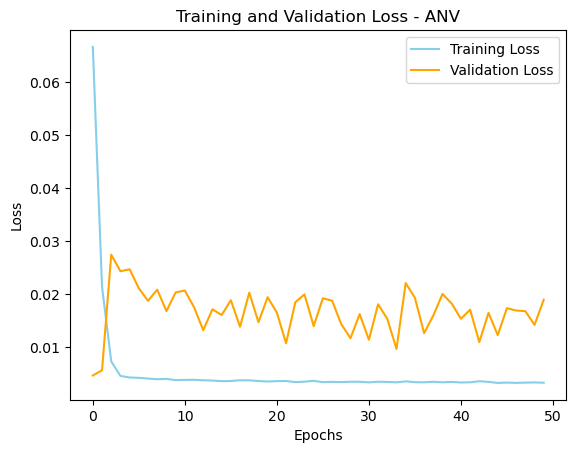

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Accuracy: 55.61%
Mean Squared Error (MSE): 114.59
Root Mean Squared Error (RMSE): 10.70


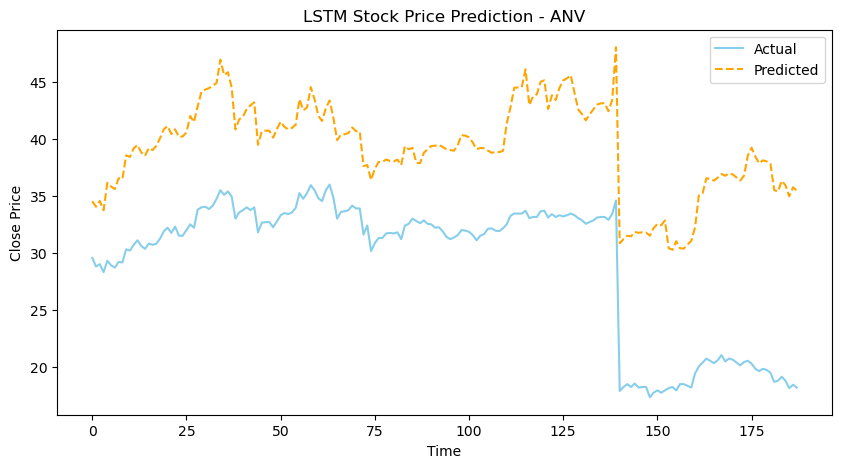

Processing dataset: DAT
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0262 - val_loss: 0.0092
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - val_loss: 0.0042
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 6.1885e-04
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - val_loss: 2.3508e-04
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - val_loss: 0.0011
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - val_loss: 0.0014
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0020
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - val_loss: 0.0021
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - val_loss: 0.0019
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129 - val_loss: 0.0013
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0013
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s

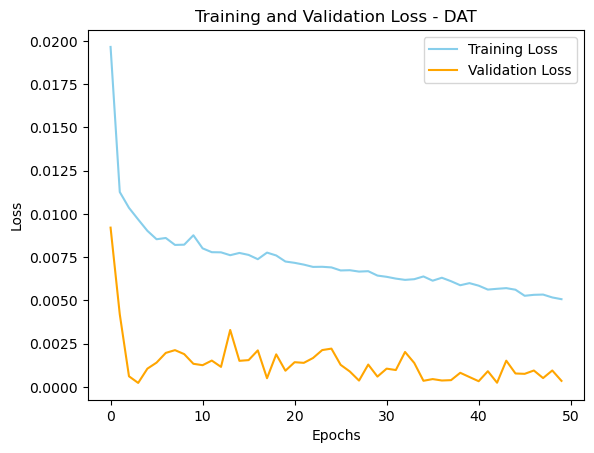

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Accuracy: 72.58%
Mean Squared Error (MSE): 6.25
Root Mean Squared Error (RMSE): 2.50


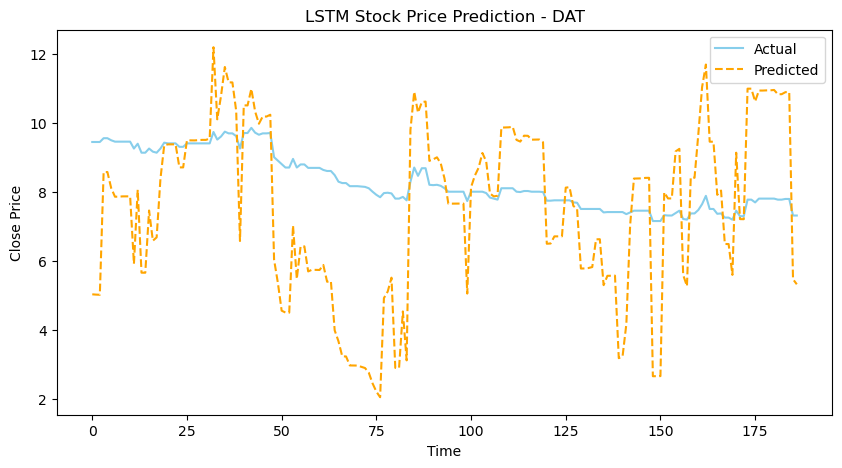

Processing dataset: HAH
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1214 - val_loss: 0.0116
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 - val_loss: 0.0172
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - val_loss: 0.0097
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 - val_loss: 0.0072
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - val_loss: 0.0073
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0024
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0011
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0012
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0014
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - val_loss: 0.0013
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0013
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

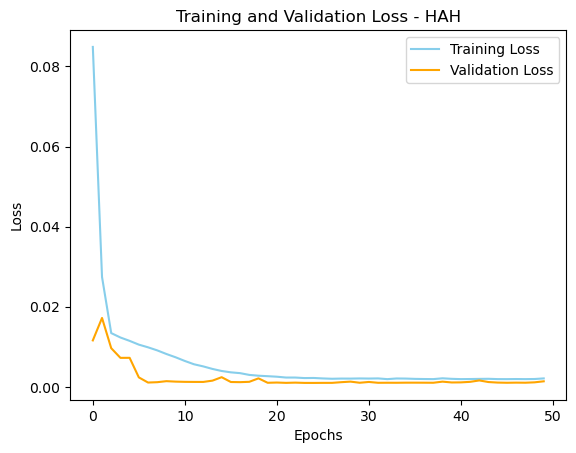

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Accuracy: 68.12%
Mean Squared Error (MSE): 214.13
Root Mean Squared Error (RMSE): 14.63


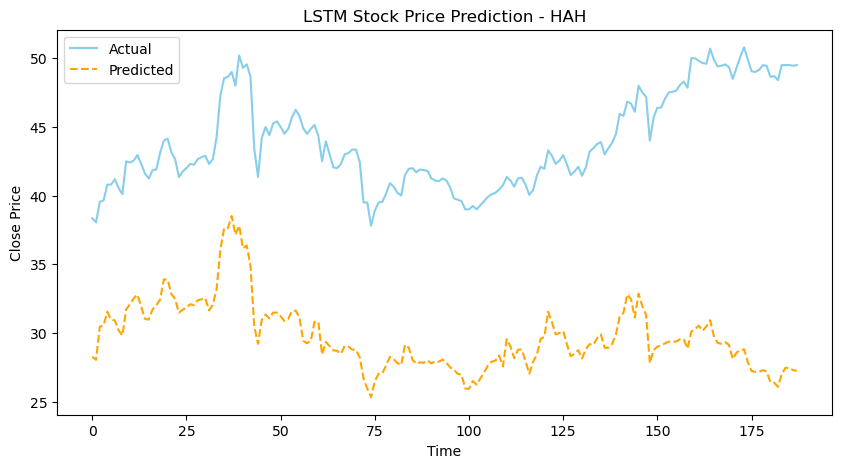

Processing dataset: KDC
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3408 - val_loss: 0.0078
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 - val_loss: 0.0046
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - val_loss: 0.0141
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0248
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0185
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - val_loss: 0.0204
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0158
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - val_loss: 0.0124
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - val_loss: 0.0144
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - val_loss: 0.0146
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - val_loss: 0.0078
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

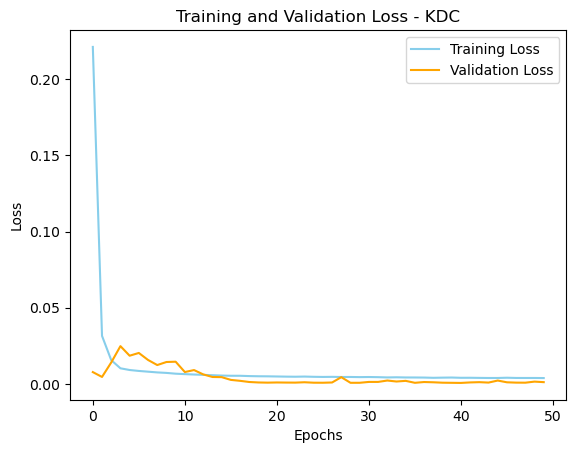

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Accuracy: 86.97%
Mean Squared Error (MSE): 48.22
Root Mean Squared Error (RMSE): 6.94


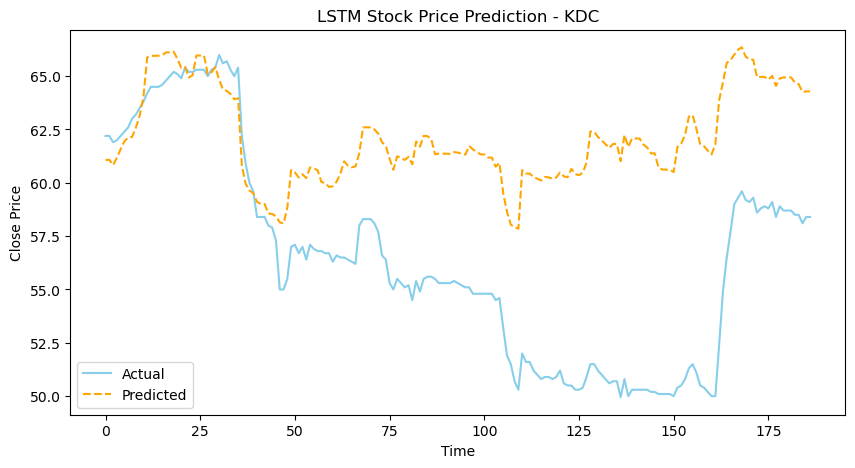

Processing dataset: NAF
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1999 - val_loss: 0.0153
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0396 - val_loss: 0.0058
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - val_loss: 0.0182
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0416
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 - val_loss: 0.0472
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0689
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136 - val_loss: 0.0724
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 - val_loss: 0.0797
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0784
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 - val_loss: 0.0828
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_loss: 0.0923
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

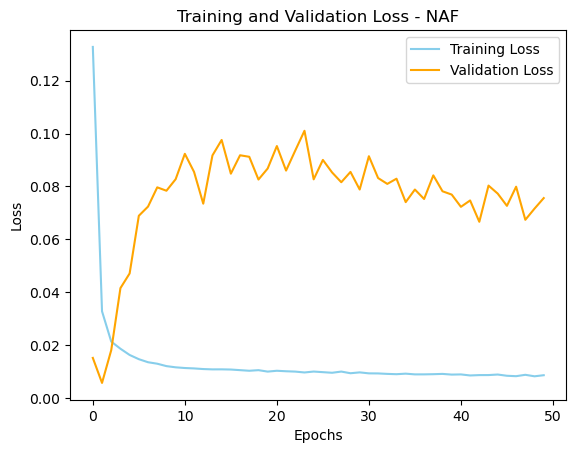

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Accuracy: 25.48%
Mean Squared Error (MSE): 230.91
Root Mean Squared Error (RMSE): 15.20


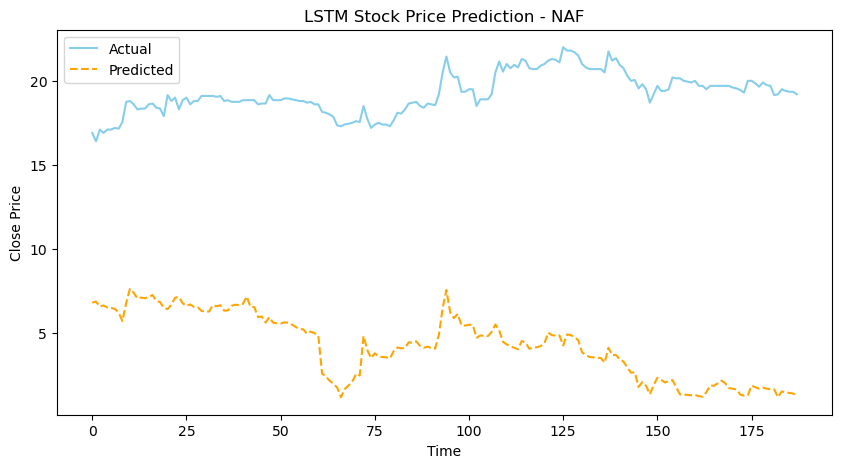

Processing dataset: PVT
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1507 - val_loss: 0.0302
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302 - val_loss: 0.0246
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - val_loss: 0.0027
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - val_loss: 0.0024
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0029
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0052
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - val_loss: 0.0022
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - val_loss: 0.0023
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - val_loss: 0.0019
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - val_loss: 0.0037
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

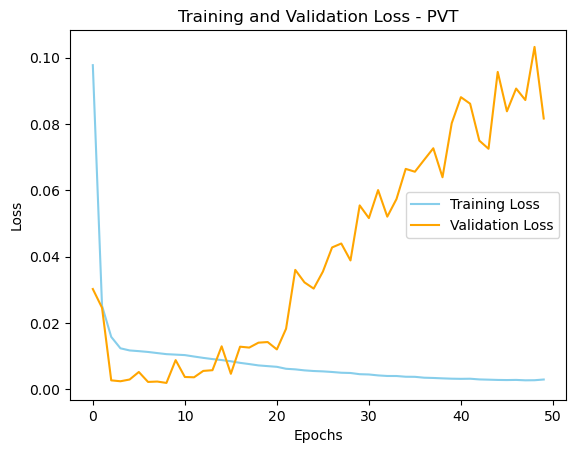

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Accuracy: 55.32%
Mean Squared Error (MSE): 170.53
Root Mean Squared Error (RMSE): 13.06


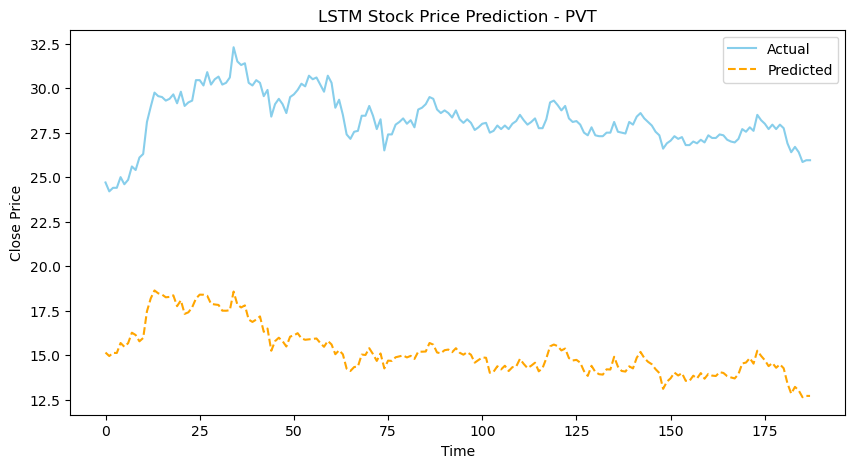

All datasets processed successfully!


In [21]:
# Store datasets in a dictionary
datasets = {
    "anv": anv_df,
    "dat": dat_df,
    "hah": hah_df,
    "kdc": kdc_df,
    "naf": naf_df,
    "pvt": pvt_df
}

# Features and target column
features = ['SMA_200', 'RSI', 'STOCH', 'GDP_Index', 'Interest rates']
target = 'Close'

# Model parameters
num_layers = 2
size_layer = 50
output_size = 1
epochs = 50
batch_size = 16

# Store results
models = {}
histories = {}
predictions_results = {}

# Process each dataset
for name, df in datasets.items():
    print(f"Processing dataset: {name.upper()}")

    # Normalize Data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_x.fit_transform(df[features])
    y = scaler_y.fit_transform(df[[target]])

    # Reshape for LSTM
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Manually Split Data Sequentially
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    # Define Model
    model = LSTMModel(num_layers, size_layer, output_size)
    model.compile(optimizer='adam', loss='mse')

    # Train Model
    history = train_model(model, X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size)

    # Store trained model and history
    models[name] = model
    histories[name] = history

    # Visualize training vs validation loss
    def plot_training_history(history):
        plt.plot(history.history['loss'], label='Training Loss', color="skyblue")
        plt.plot(history.history['val_loss'], label='Validation Loss', color="orange")
        plt.title(f"Training and Validation Loss - {name.upper()}")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    # Visualize Training Progress
    plot_training_history(history)

    # Evaluate Model
    predictions_rescaled, accuracy, mse, rmse = evaluate_model(model, X_test, y_test, scaler_y)
    y_test_rescaled = scaler_y.inverse_transform(y_test)

    # Store predictions
    predictions_results[name] = {
        "actual": y_test_rescaled,
        "predicted": predictions_rescaled
    }

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_rescaled, label="Actual", color="skyblue")
    plt.plot(predictions_rescaled, label="Predicted", color="orange", linestyle='dashed')
    plt.title(f"LSTM Stock Price Prediction - {name.upper()}")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()

print("All datasets processed successfully!")